# Global Video Game Sales Data Analysis

### Step 0: Importing Data

Initial setup of Python modules

In [47]:
#!py -m pip install pandas
#!py -m pip install zipfile
#!py -m pip install kaggle
#!py -m pip install matplotlib

import pandas as pd
import zipfile
import kaggle
import matplotlib as plt

Get Dataset with Kaggle API

In [48]:
kaggle.api.authenticate()

kaggle.api.dataset_download_files('thedevastator/global-video-game-sales')

In [49]:
#unzip dataset file
unzipped_data = 'global-video-game-sales.zip'
with zipfile.ZipFile(unzipped_data, 'r') as file:
    file.extractall()

In [50]:
game_sales = pd.read_csv('vgsales.csv')

### Step 1: Initial Exploration of the Data

We can look at the shape of the data to get an understanding of the number of rows and columns.

In [51]:
game_sales.shape

(16598, 11)

The data has 16598 rows with 11 columns.
<br><br>Using game_sales.info(), we can see some attributes of the data.

In [52]:
game_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


The attributes are the column names, the non-null rows in each column, and the data types of each column.
<br>Already we can see that the number of non-null rows in each column are not equal which means the data will need cleaning.

<br>To further confirm the amount of null data, we can sum up the amount of null values in each column.

In [53]:
game_sales.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Looking at game_sales, we can get a clearer understanding of how the dataset is structured.

In [54]:
game_sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


With this inital data exploration in mind, there are a few questions I am interested in answering.

These questions are as follows:
<br>1. What game genres are best and worst selling?
<br>2. What is the most popular platform for games?
<br>3. What companies have the most successful games?
<br>4. What genres and platforms have the most sales in each country? (NA, EU, JP, and Other)
<br>5. Forecast the future of game sales based on previous years sales


### Step 2: Preparing the Data

Check for duplicate rows

In [55]:
game_sales.loc[game_sales.duplicated()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


No rows are duplicated in the dataset.
<br>We could also check for duplicated items in each column.
<br>However, because of the type of data in this dataset each column could realistically have duplicate values.

### Step 3: Exploring Features

In [56]:
game_sales['Platform'].value_counts().head(5)

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
Name: count, dtype: int64

In [57]:
game_sales['Platform'].value_counts().tail(5)

Platform
WS      6
3DO     3
TG16    2
GG      1
PCFX    1
Name: count, dtype: int64

This shows us the most popular and least popular platforms for games in the dataset.

We can create a bar graph to get a visual understanding of the difference in the games released for the top 10 platforms.

Text(0.5, 0, 'Count')

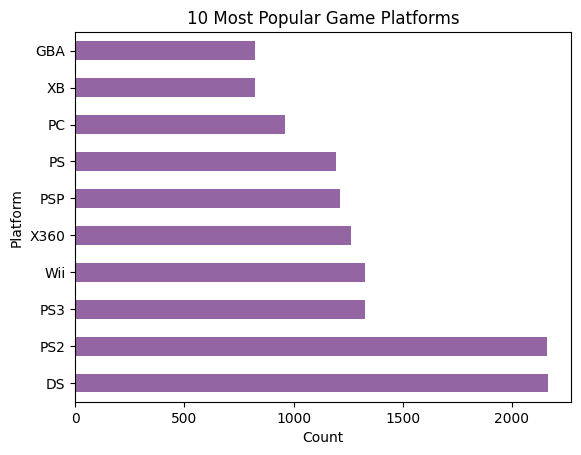

In [63]:
platform_plot = game_sales['Platform'].value_counts().head(10).plot(kind='barh', title='10 Most Popular Game Platforms', color='#9366a3')
platform_plot.set_ylabel('Platform')
platform_plot.set_xlabel('Count')

We can repeat the same process for the Years and Publishers columns.

In [59]:
game_sales['Year'].value_counts().head(5)

Year
2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
Name: count, dtype: int64

In [60]:
game_sales['Year'].value_counts().tail(5)

Year
1985.0    14
1984.0    14
1980.0     9
2017.0     3
2020.0     1
Name: count, dtype: int64

Text(0, 0.5, 'Count')

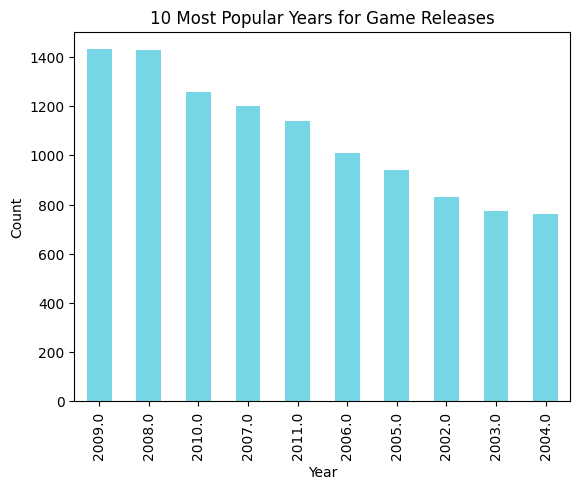

In [61]:
top_years_plot = game_sales['Year'].value_counts().head(10).plot(kind='bar', title='10 Most Popular Years for Game Releases', color='#77D6E5')
top_years_plot.set_ylabel('Count')

Text(0.5, 0, 'Year')

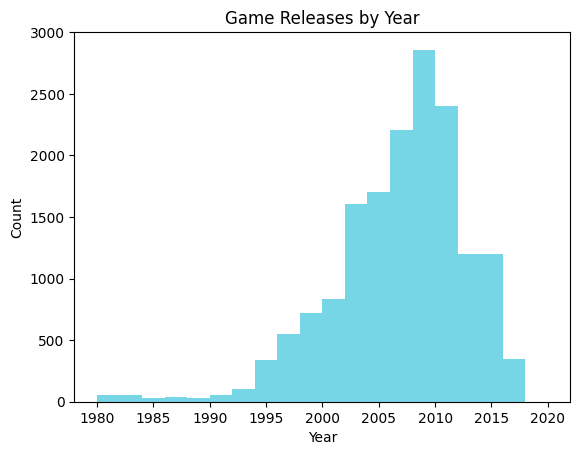

In [64]:
years_plot = game_sales['Year'].plot(kind='hist', bins=20, title='Game Releases by Year', color='#77D6E5')
years_plot.set_ylabel('Count')
years_plot.set_xlabel('Year')